In [1]:
library(ggplot2)
library(tidyverse)

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
library(TDA) 
library(MeanShift)
library(kernlab)

Loading required package: parallel
Loading required package: wavethresh
Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

WaveThresh: R wavelet software, release 4.6.8, installed

Copyright Guy Nason and others 1993-2016

Note: nlevels has been renamed to nlevelsWT


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha



## Algunos Datos Sintéticos:

In [3]:
set.seed(1)
n <- 1e3
r <- runif(n = n, min = 0, max = 1)
theta <- runif(n = n, min = 0, max = 2*pi)

In [7]:
x <- r*cos(theta)
y <- r*sin(theta)

MK <- data.frame(x = c(x, x-2, x+2), y = c(y, y+2, y+2))

s <- 0.3
sr <- 1
MK2 <- data.frame(x = c(x, s*x-sr, s*x+sr), y = c(y, s*y+sr, s*y+sr))

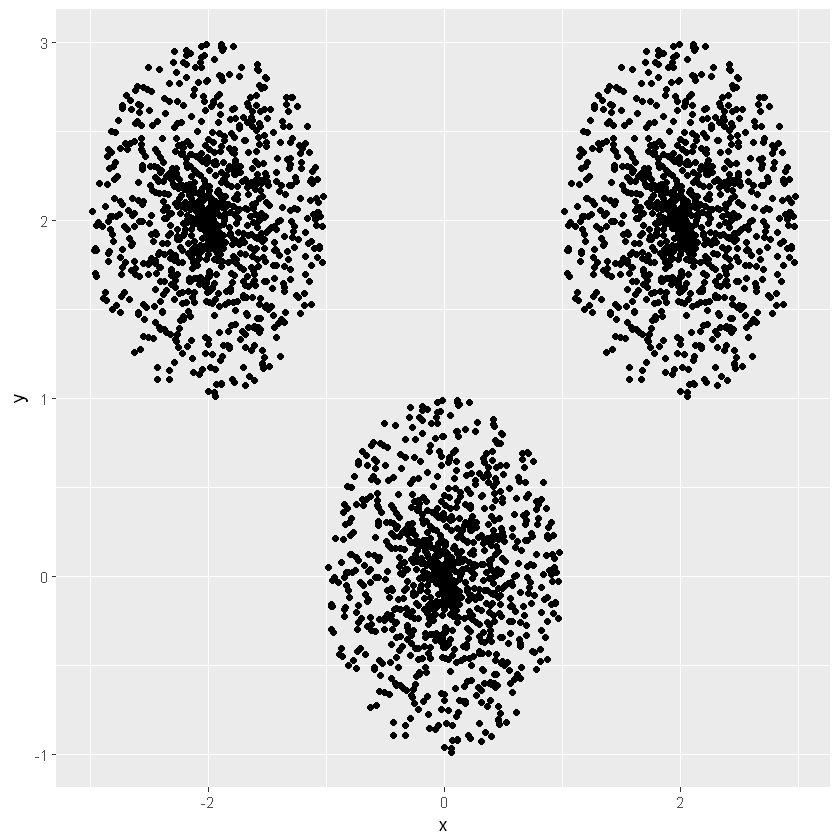

In [5]:
#png("MK1.png", width = 18, height = 16, units = 'cm', res = 300)
ggplot(MK, aes(x = x, y = y)) + geom_point()
#dev.off()

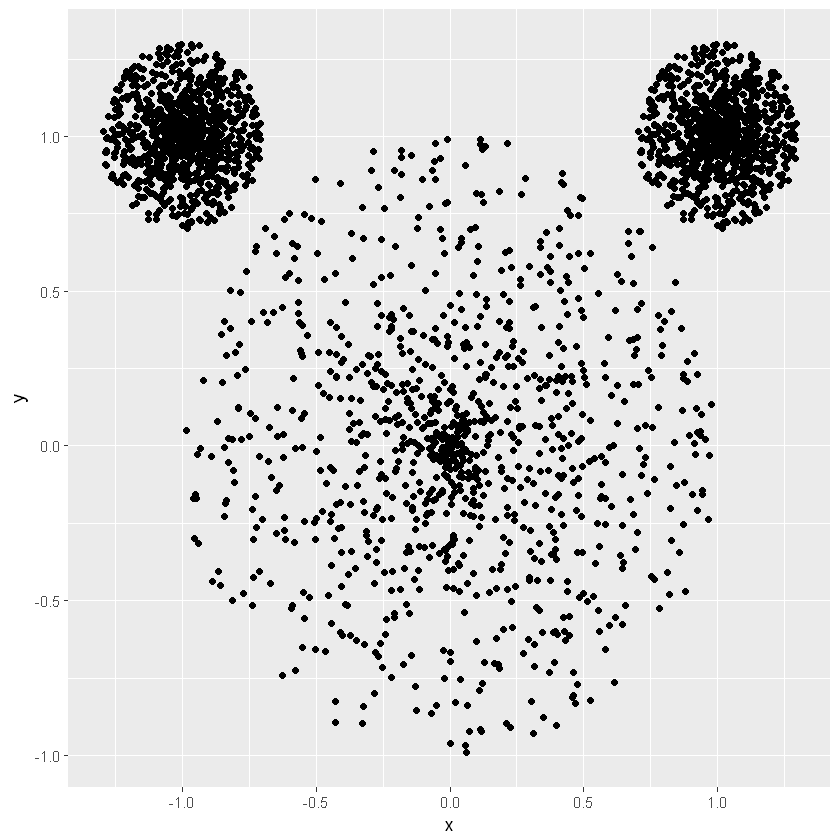

In [6]:
#png("MK2.png", width = 18, height = 16, units = 'cm', res = 300)
ggplot(MK2, aes(x = x, y = y)) + geom_point()
#dev.off()

In [10]:
x <- cos(theta)
y <- sin(theta)

Two_rings <- data.frame(x = c(x, 2*x), y = c(y, 2*y))

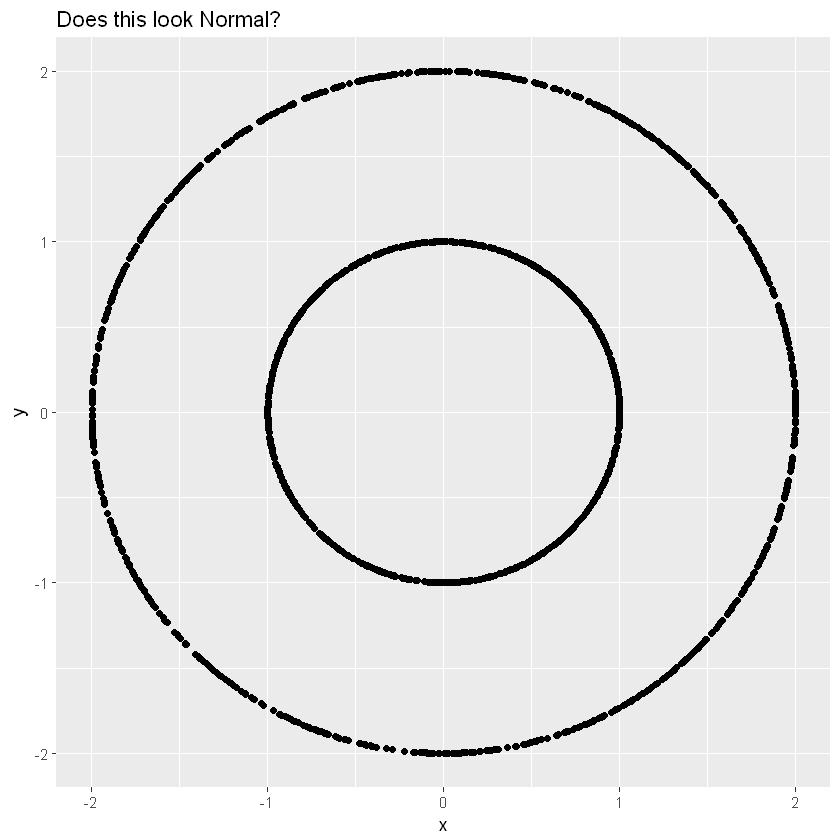

In [8]:
#png("2Rings.png", width = 18, height = 19, units = 'cm', res = 300)
ggplot(Two_rings, aes(x = x, y = y)) + geom_point() + 
    ggtitle('Does this look Normal?')
#dev.off()

## K-means

In [12]:
c1 <- kmeans(x = MK, centers = 3)
c2 <- kmeans(x = MK2, centers = 3)
c3 <- kmeans(x = Two_rings, centers = 2)

In [13]:
c1

K-means clustering with 3 clusters of sizes 1000, 1000, 1000

Cluster means:
            x          y
1  2.02798102 2.01710299
2 -1.97201898 2.01710299
3  0.02798102 0.01710299

Clustering vector:
   [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
  [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [186] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [223] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [260] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [297] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [334] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [15]:
MK_data <- MK %>% mutate(k_means = factor(c1$cluster))
MK2_data <- MK2 %>% mutate(k_means = factor(c2$cluster))
Two_rings_data <- Two_rings %>% mutate(k_means = factor(c3$cluster))

NULL

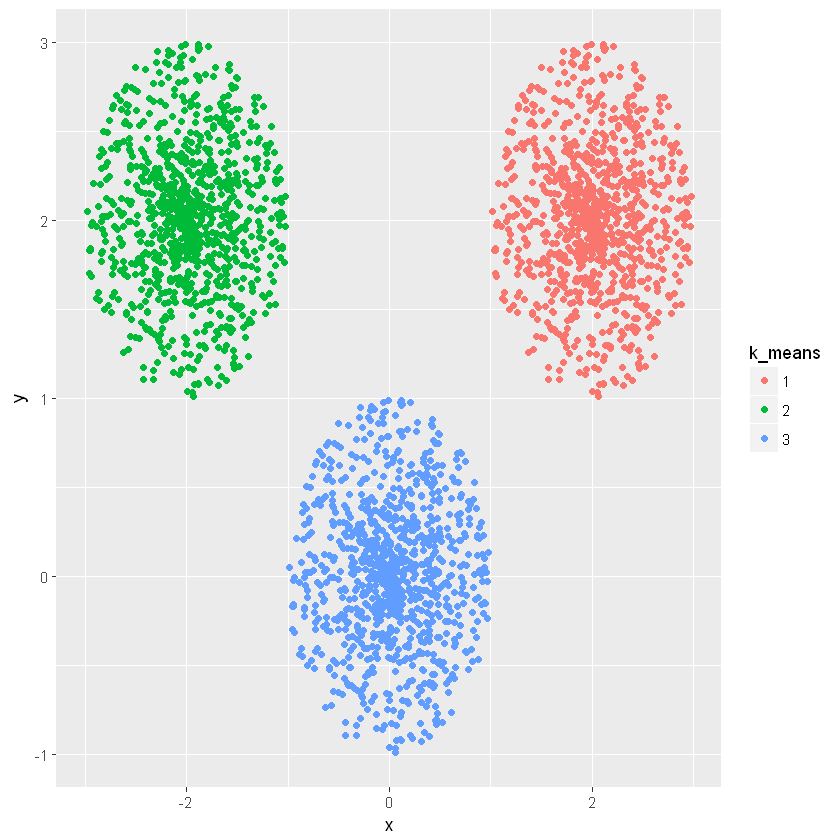

In [19]:
#png("kNN1.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot(MK_data, aes(x = x, y = y)) + geom_point(aes(color = k_means)) #+ 
    ggtitle('k-means') + 
    theme(legend.position = "none") 
#dev.off()

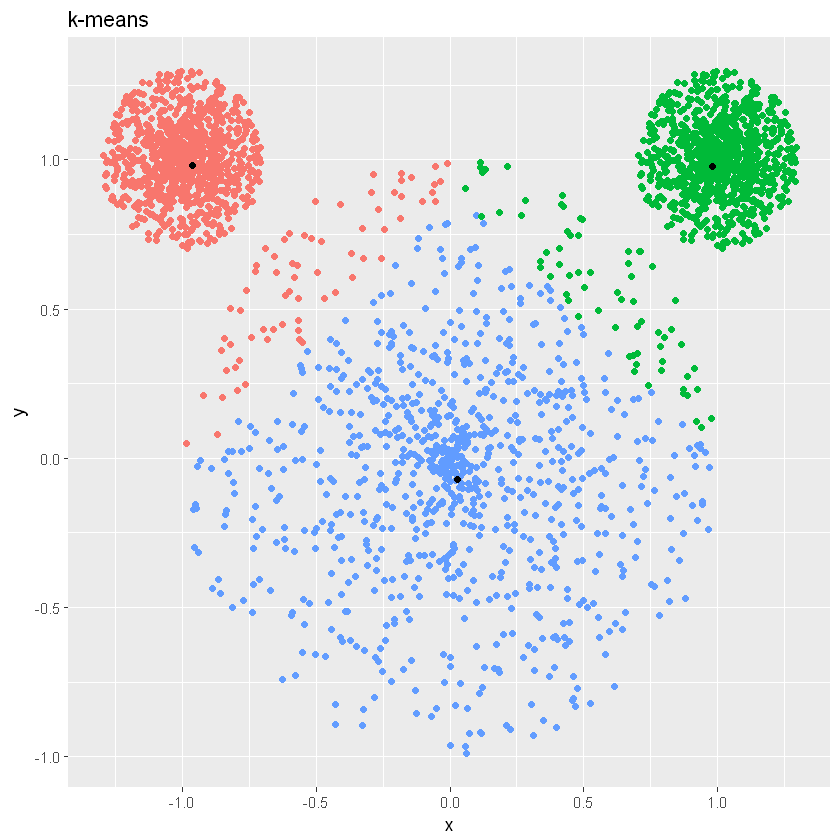

In [14]:
#png("kNN2.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot(MK2_data, aes(x = x, y = y)) + geom_point(aes(color = k_means)) +
    geom_point(data = data.frame(c2$centers), aes(x = x, y = y)) +
    ggtitle('k-means') + 
    theme(legend.position = "none")
#dev.off()

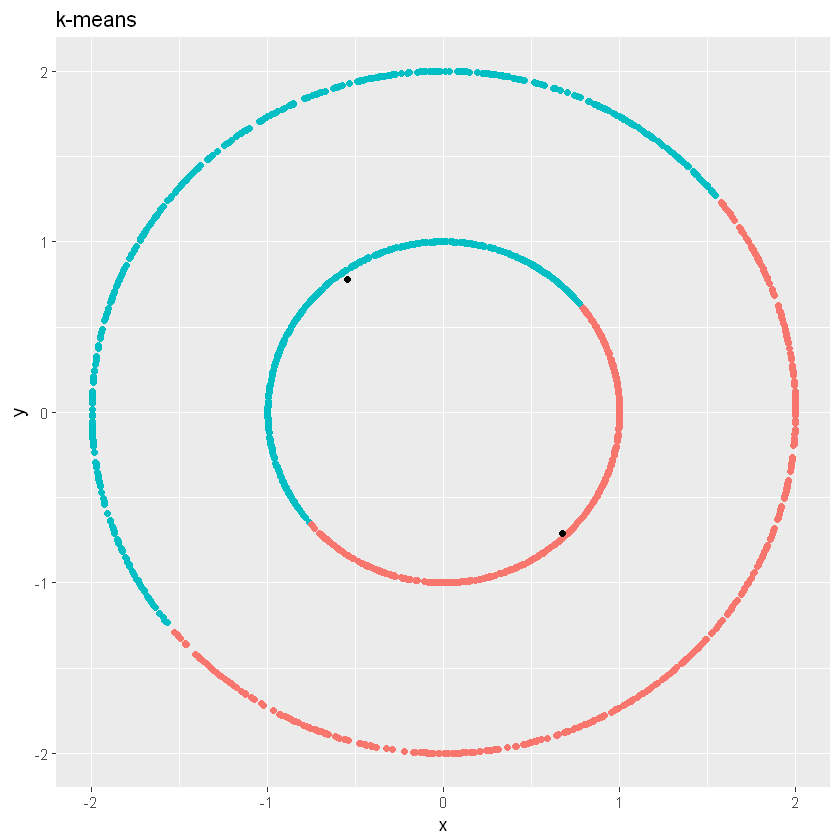

In [16]:
#png("kNNtwoRings.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot() + 
    geom_point(data = Two_rings_data, aes(x = x, y = y, color = k_means)) +
    geom_point(data = data.frame(c3$centers), aes(x = x, y = y)) +
    ggtitle('k-means') + 
    theme(legend.position = "none")
#dev.off()

In [17]:
c4 <- kmeans(x = MK2, centers = 50)
c5 <- kmeans(x = Two_rings, centers = 30)

In [18]:
MK2_data <- MK2 %>% mutate(k_means_overfit = factor(c4$cluster))
Two_rings_data <- Two_rings %>% mutate(k_means_overfit = factor(c5$cluster))

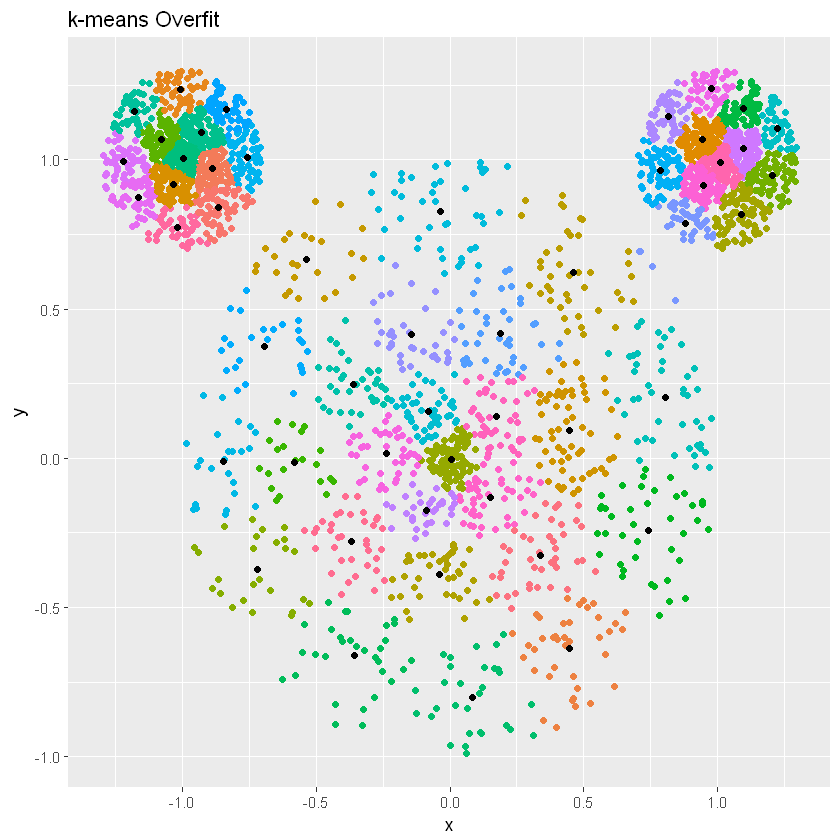

In [20]:
#png("kNN2overfit.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot() + 
    geom_point(data = MK2_data, aes(x = x, y = y, color = k_means_overfit)) + 
    geom_point(data = data.frame(c4$centers), aes(x = x, y = y)) + 
    ggtitle('k-means Overfit') + 
    theme(legend.position = "none") 
#dev.off()

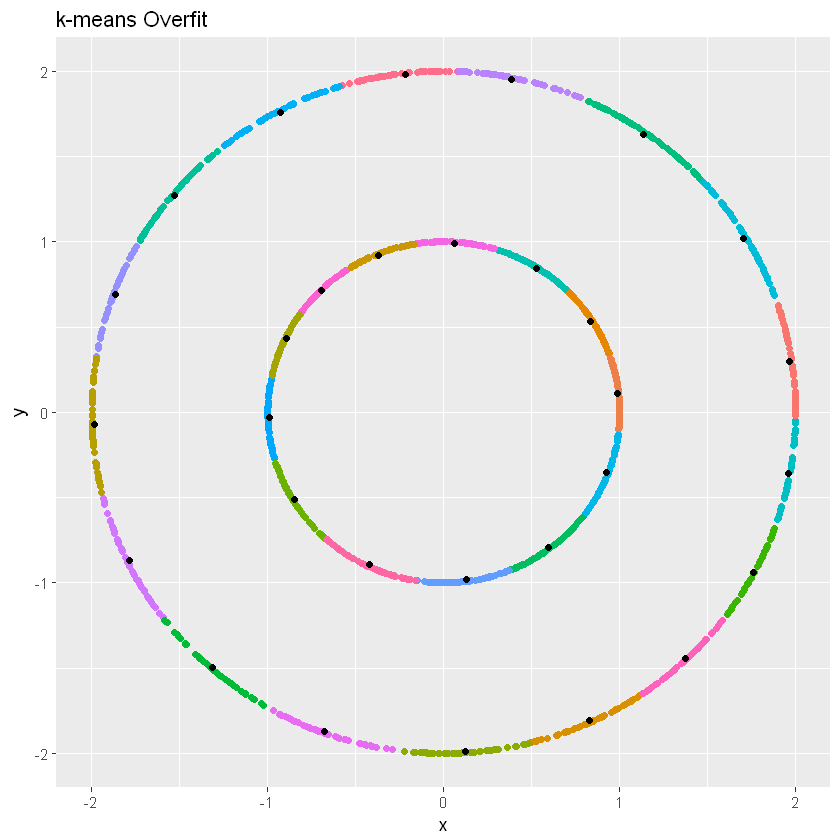

In [22]:
#png("kNN2ringsOverfit.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot() + 
    geom_point(data = Two_rings_data, aes(x = x, y = y, color = k_means_overfit)) + 
    geom_point(data = data.frame(c5$centers), aes(x = x, y = y)) + 
    ggtitle('k-means Overfit') + 
    theme(legend.position = "none") 
#dev.off()

## Density-based Clustering

In [20]:
set.seed(2)
n <- 1e3
r <- runif(n = n, min = 0, max = 1)
theta <- runif(n = n, min = 0, max = 2*pi)

In [21]:
x <- r*cos(theta)
y <- r*sin(theta)

DBC <- data.frame(x = c(x, x-2, x-2), y = c(y, y+2, y+3))

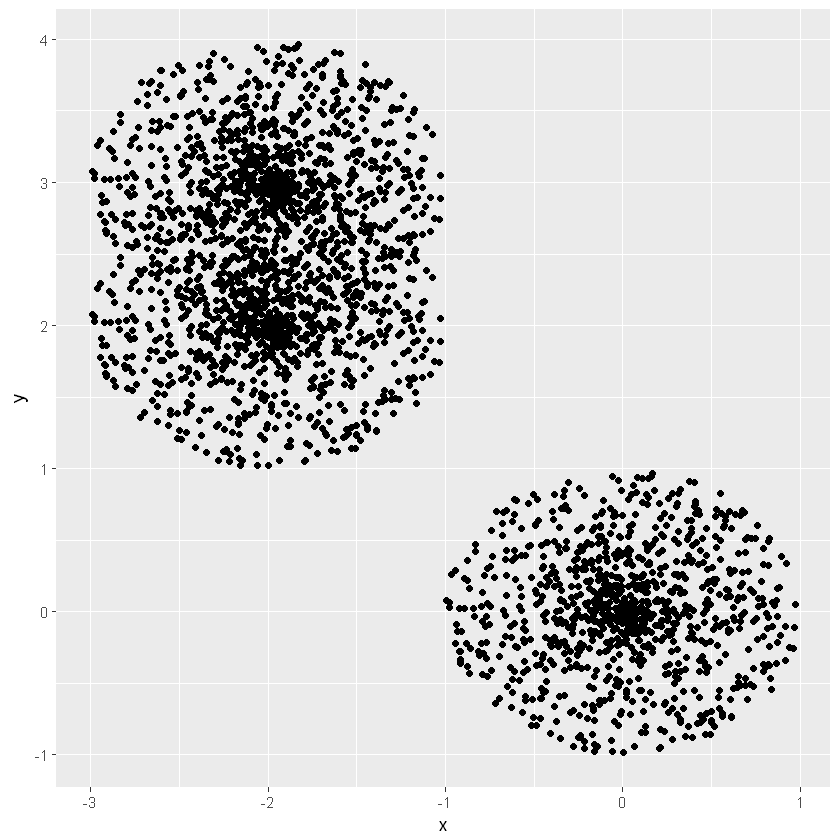

In [22]:
ggplot(DBC, aes(x, y)) + geom_point()

In [27]:
TreeKDE <- clusterTree(DBC, k = 100, h = 0.2, density = "kde")

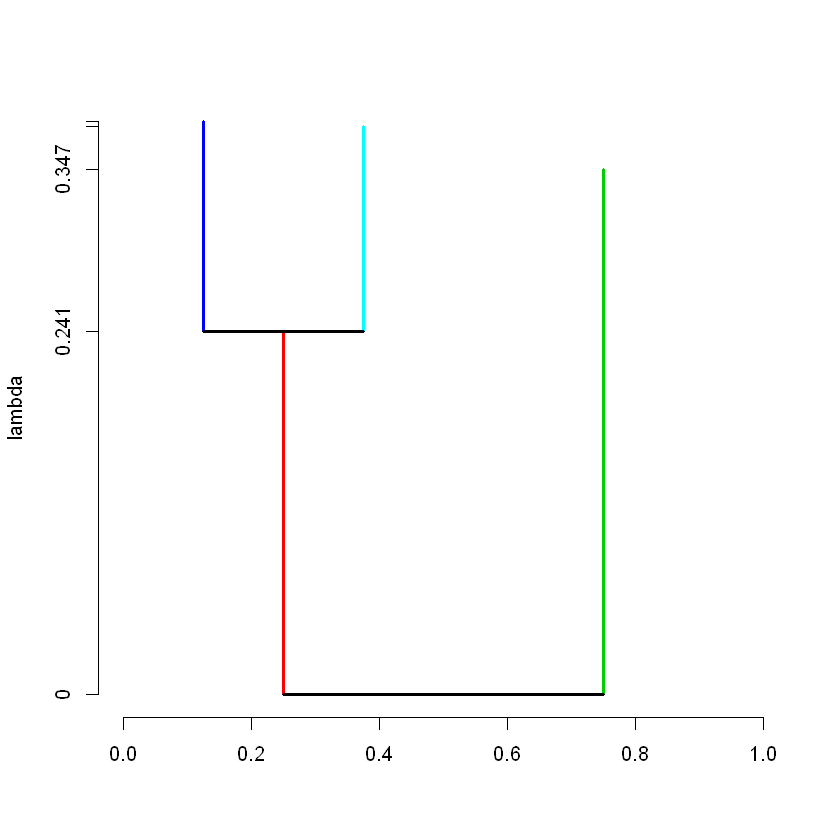

In [28]:
#png("ClusterTree.png", width = 18, height = 16, units = 'cm', res = 300)
plot(TreeKDE)
#dev.off()

In [188]:
treeLables <- function(DF, tree){
    # inputs: 
    #       - data.frame with points. 
    #       - tree from the TDA clusterTree function. 
    #
    # outputs: 
    #       - data.frame with the cluster labels. 
    #
    # https://rdrr.io/cran/TDA/man/clusterTree.html
    
    DF_tree <- DF %>% mutate(cluster = NA)
    
    for (i in tree[["id"]]){
        index <- tree[["DataPoints"]][[i]]
        DF_tree[index,]$cluster <- i
    }
    DF_tree <- DF_tree %>% mutate(cluster = factor(cluster))
    return(DF_tree)
}

In [189]:
DBC_tree <- treeLables(DBC, TreeKDE)
DBC_tree %>% head()

x,y,cluster
-0.08168488,0.165858467,3
0.67487401,0.194613355,3
-0.06582024,-0.569535584,3
-0.16786152,0.007997405,3
0.08508819,0.939996115,3
0.66278709,0.671459809,3


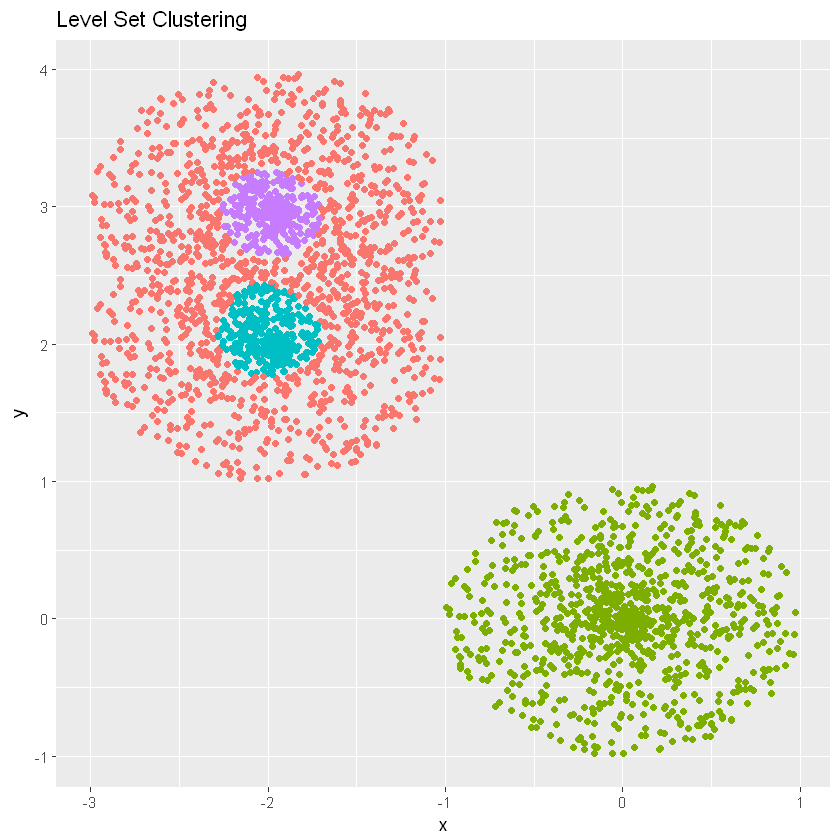

In [191]:
#png("LevelSetClustering.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot(DBC_tree, aes(x = x, y = y)) + 
    geom_point(aes(color = cluster)) +
    ggtitle('Level Set Clustering') +
    theme(legend.position = "none")
#dev.off()

## Mean Shift Clustering

(Un poco lento)

In [83]:
dbc <- as.matrix(DBC)

In [84]:
bms <-  bmsClustering(t(dbc))


Running blurring mean-shift algorithm...

Blurring mean-shift algorithm ran successfully.

Finding clusters...

The algorithm found 2 clusters.



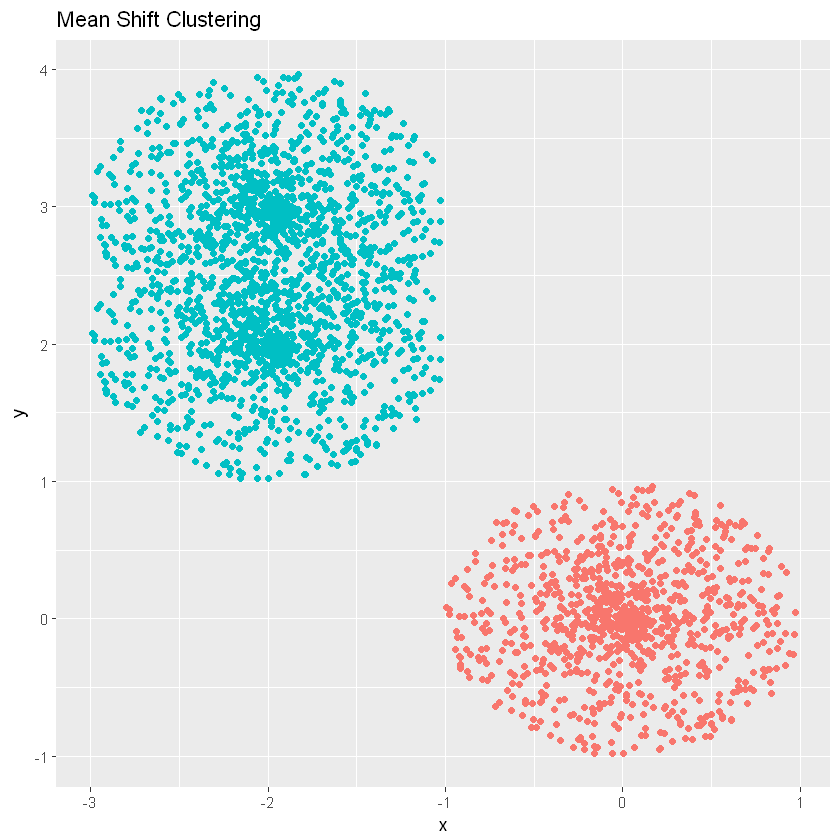

In [192]:
DBC_MSC <- DBC %>% mutate(msc_labels = factor(bms$labels))

#png("MeanShift.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot(DBC_MSC, aes(x = x, y = y)) + 
    geom_point(aes(color = msc_labels)) +
    ggtitle("Mean Shift Clustering") +
    theme(legend.position = "none")
#dev.off()

## Spectral Clustering

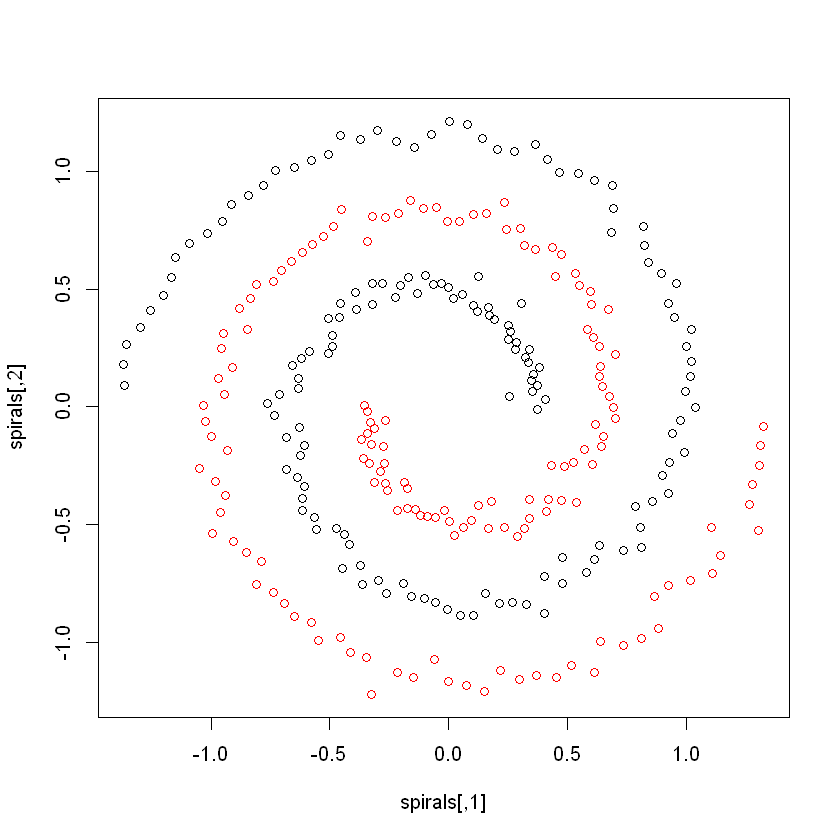

In [3]:
data(spirals)
sc <- specc(spirals, centers=2)
plot(spirals, col = sc)

In [100]:
# Graph example: 
# 1-2  3-4-5 6-7-8

W = diag(8)

W[1,] <- c(0, 1, 0, 0, 0, 0, 0, 0)
W[2,] <- c(1, 0, 0, 0, 0, 0, 0, 0)
W[3,] <- c(0, 0, 0, 1, 0, 0, 0, 0)
W[4,] <- c(0, 0, 1, 0, 1, 0, 0, 0)
W[5,] <- c(0, 0, 0, 1, 0, 0, 0, 0)
W[6,] <- c(0, 0, 0, 0, 0, 0, 1, 0)
W[7,] <- c(0, 0, 0, 0, 0, 1, 0, 1)
W[8,] <- c(0, 0, 0, 0, 0, 0, 1, 0)


D = diag(colSums(W))
L = D - W

In [101]:
W
D
L

0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0
0,0,1,0,1,0,0,0
0,0,0,1,0,0,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,1,0,1
0,0,0,0,0,0,1,0


1,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0
0,0,0,2,0,0,0,0
0,0,0,0,1,0,0,0
0,0,0,0,0,1,0,0
0,0,0,0,0,0,2,0
0,0,0,0,0,0,0,1


1,-1,0,0,0,0,0,0
-1,1,0,0,0,0,0,0
0,0,1,-1,0,0,0,0
0,0,-1,2,-1,0,0,0
0,0,0,-1,1,0,0,0
0,0,0,0,0,1,-1,0
0,0,0,0,0,-1,2,-1
0,0,0,0,0,0,-1,1


In [102]:
ED <- eigen(L)
ED

0.0000000,0.0000000,-0.7071068,0.000000e+00,0.000000e+00,0.0000000,0.0000000,0.7071068
0.0000000,0.0000000,0.7071068,0.000000e+00,0.000000e+00,0.0000000,0.0000000,0.7071068
0.0000000,-0.4082483,0.0000000,0.000000e+00,-7.071068e-01,0.0000000,0.5773503,0.0000000
0.0000000,0.8164966,0.0000000,0.000000e+00,9.420555e-16,0.0000000,0.5773503,0.0000000
0.0000000,-0.4082483,0.0000000,0.000000e+00,7.071068e-01,0.0000000,0.5773503,0.0000000
-0.4082483,0.0000000,0.0000000,-7.071068e-01,0.000000e+00,0.5773503,0.0000000,0.0000000
0.8164966,0.0000000,0.0000000,9.420555e-16,0.000000e+00,0.5773503,0.0000000,0.0000000
-0.4082483,0.0000000,0.0000000,7.071068e-01,0.000000e+00,0.5773503,0.0000000,0.0000000


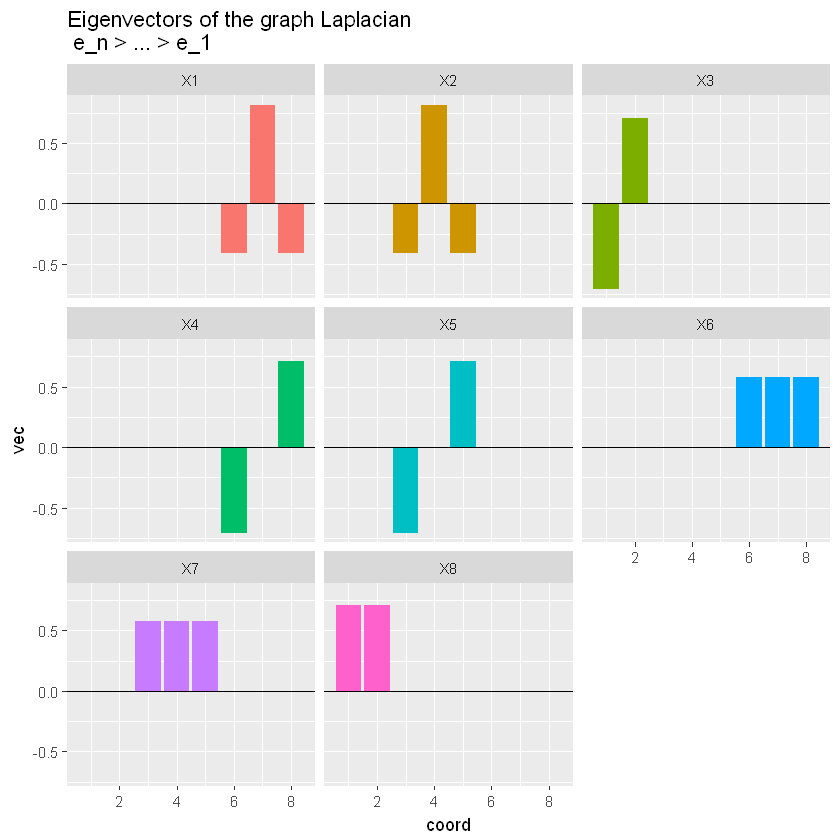

In [121]:
ev <- data.frame(ED$vectors) %>% mutate(coord = 1:8) %>% gather(num, vec, -coord)
#png("Spectral.png", width = 18, height = 18, units = 'cm', res = 300)
ggplot(ev, aes(x = coord, y = vec, fill = num)) + 
    geom_bar(stat='identity') + facet_wrap(~num) +
    geom_abline(slope = 0) + 
    theme(legend.position = "none") + 
    ggtitle('Eigenvectors of the graph Laplacian \n e_n > ... > e_1')
#dev.off()